<a href="https://colab.research.google.com/github/rohankalbag/Hand-Gesture-Recognition/blob/main/hand_gesture_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Gesture Recognition

Let us make use of Electromyographic data obtained from human hands connected to an electromyography (EMG) sensor to train a Neural Network to predict whether the inputted hand gesture is **Stone/Paper/Scissor** and then predict the opposing move to defeat the user

[Dataset Reference](https://www.kaggle.com/datasets/kyr7plus/emg-4)

# Connecting With Kaggle API

In [1]:
! pip install -q kaggle

Upload `kaggle.json` file to make use of the Kaggle API

In [ ]:
from google.colab import files

files.upload()

In [3]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          11091        339  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33            654         59  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6330        186  0.9705882        
ruchi798/data-science-job-salaries                          

In [4]:
!kaggle datasets download -d kyr7plus/emg-4

  0% 0.00/868k [00:00<?, ?B/s]
100% 868k/868k [00:00<00:00, 66.7MB/s]


In [5]:
!unzip emg-4.zip

Archive:  emg-4.zip
  inflating: 0.csv                   
  inflating: 1.csv                   
  inflating: 2.csv                   
  inflating: 3.csv                   


In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
stone = pd.read_csv("0.csv",names=[i for i in range(1,65)]+['result'])
paper = pd.read_csv("1.csv",names=[i for i in range(1,65)]+['result'])
scissor = pd.read_csv("2.csv",names=[i for i in range(1,65)]+['result'])

# EMG data for Stone, Paper & Scissor Hand Gestures
![](https://media.istockphoto.com/vectors/rock-scissors-paper-icons-hand-gestures-icons-set-rock-scissors-paper-vector-id1275459573?k=20&m=1275459573&s=612x612&w=0&h=CdoWRxTeXhWN20ShDSfmwjlYDxnG0VjBmrhGYPr2iWw=)

In [8]:
stone.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [9]:
paper.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1
1,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
2,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
3,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
4,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1


In [10]:
scissor.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0,-2.0,-3.0,-4.0,-21.0,7.0,-8.0,-12.0,2
1,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
2,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
3,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
4,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2


In [11]:
dataset = pd.concat(objs=[stone,paper,scissor], ignore_index=True)

In [12]:
dataset

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,1.0,-14.0,-5.0,-9.0,-10.0,4.0,-3.0,-4.0,3.0,4.0,...,22.0,8.0,28.0,-3.0,8.0,22.0,35.0,-1.0,-11.0,2
8752,-3.0,-8.0,-7.0,-7.0,-18.0,-49.0,-5.0,9.0,23.0,0.0,...,-8.0,8.0,17.0,9.0,-9.0,-1.0,-6.0,0.0,7.0,2
8753,-13.0,3.0,-4.0,-1.0,-7.0,15.0,-4.0,-6.0,-4.0,-9.0,...,6.0,-3.0,18.0,-2.0,-9.0,-11.0,-9.0,-4.0,22.0,2
8754,8.0,-24.0,-11.0,-7.0,21.0,23.0,0.0,6.0,-22.0,-10.0,...,-7.0,19.0,38.0,7.0,3.0,6.0,-5.0,-2.0,7.0,2


# Covariance Matrix

In [13]:
covariance_matrix = dataset[range(1,65)].corr()

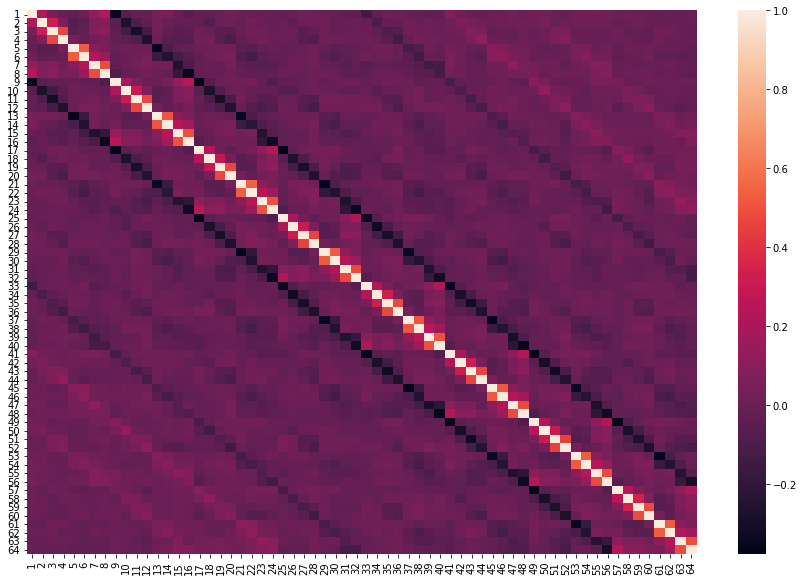

In [14]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 10]
sns.heatmap(covariance_matrix, xticklabels = covariance_matrix.columns, yticklabels=covariance_matrix.columns)
plt.show()

### Since we do not see any strong positive/negative correlation between each of the rows we shall train a Neural Net with 64 inputs and 3 outputs (to one hot encode stone-paper-scissor)

## Number of Hidden Layers and Neurons
[Reference Used](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

We make use of $n_h = \frac{n_s}{\alpha*(n_i+n_o)}$ to evaluate the number of hidden neurons used $\approx$ 65 after putting in $\alpha = 2, n_i =64, n_o = 3, n_s=8756$ 

Therefore architecture selected is 2 hidden layers with 46 and 19 neurons each

In [15]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(64,))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
l1 = tf.keras.layers.Dense(46, activation=tf.nn.relu)(inputs)
l2 = tf.keras.layers.Dense(19, activation=tf.nn.relu)(l1)
outputs = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(l2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 46)                2990      
                                                                 
 dense_1 (Dense)             (None, 19)                893       
                                                                 
 dense_2 (Dense)             (None, 3)                 60        
                                                                 
Total params: 3,943
Trainable params: 3,943
Non-trainable params: 0
_________________________________________________________________


#Test Train Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[range(1,65)], dataset['result'], test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Training and Testing the Model

Epoch 1/40
96/96 [==============================] - 1s 4ms/step - loss: 3.7752 - accuracy: 0.4654 - val_loss: 1.5265 - val_accuracy: 0.5525
Epoch 2/40
96/96 [==============================] - 0s 2ms/step - loss: 1.0961 - accuracy: 0.6413 - val_loss: 0.9437 - val_accuracy: 0.6404
Epoch 3/40
96/96 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.7291 - val_loss: 0.7718 - val_accuracy: 0.6929
Epoch 4/40
96/96 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7825 - val_loss: 0.6823 - val_accuracy: 0.7203
Epoch 5/40
96/96 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8195 - val_loss: 0.6202 - val_accuracy: 0.7557
Epoch 6/40
96/96 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8499 - val_loss: 0.5696 - val_accuracy: 0.7785
Epoch 7/40
96/96 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8755 - val_loss: 0.5397 - val_accuracy: 0.7900
Epoch 8/40
96/96 [==

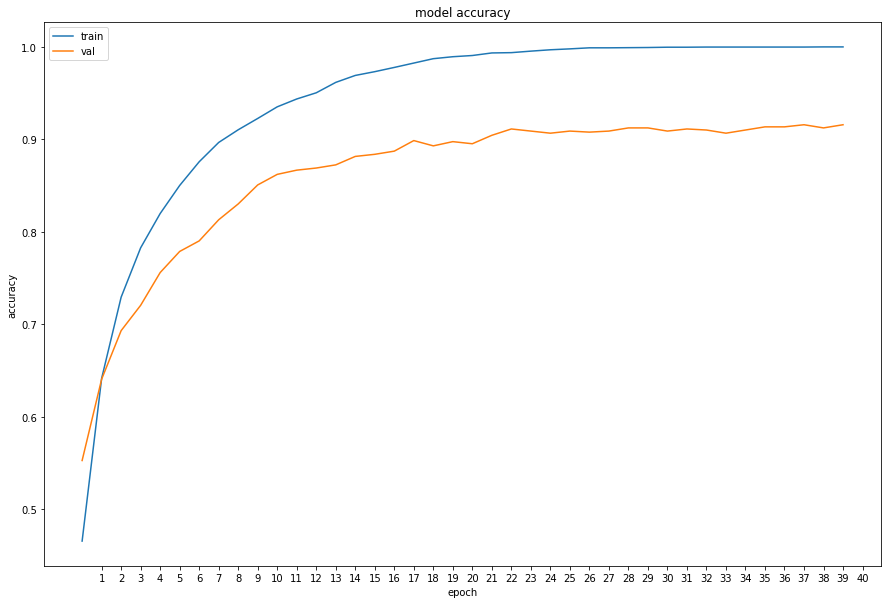

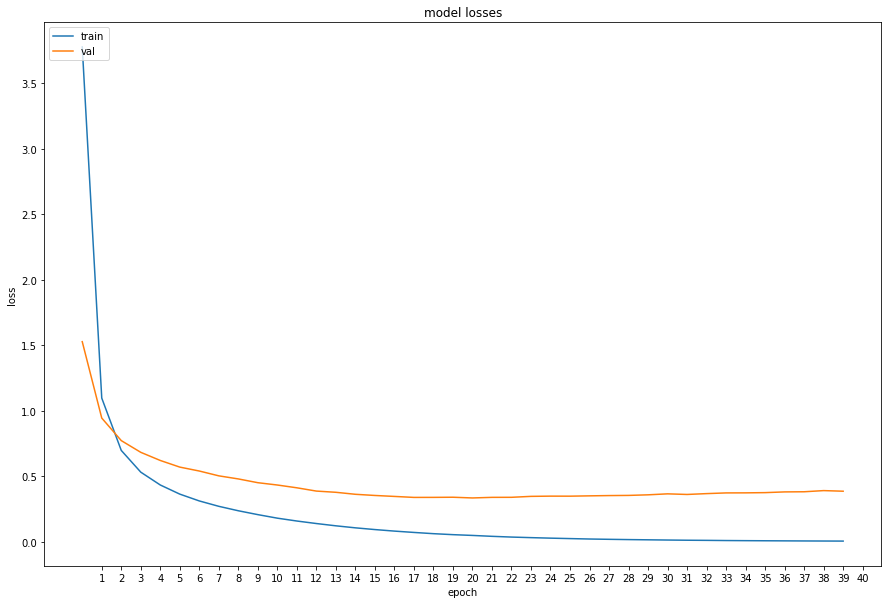

In [20]:
batch_size = 64
epochs = 40

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.125, callbacks=[callback])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(1,epochs+1))
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(1,epochs+1))
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = to_categorical(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       584
           1       0.91      0.92      0.92       578
           2       0.87      0.89      0.88       590

   micro avg       0.92      0.92      0.92      1752
   macro avg       0.92      0.92      0.92      1752
weighted avg       0.92      0.92      0.92      1752
 samples avg       0.92      0.92      0.92      1752



Thus we obtain an average $F_1$ score of $92\%$ with this architecture which is really great!

# Class Specific Test Data

In [23]:
test_stone = X_test[np.argmax(y_test, axis = 1)==0]
test_paper = X_test[np.argmax(y_test, axis = 1)==1]
test_scissor = X_test[np.argmax(y_test, axis = 1)==2]

# Class to play Stone-Paper-Scissor!

In [24]:
class stone_paper_scissor:  
  def winningmove(self, inp):
    if(inp==0):
      return "I play paper"
    elif(inp==1):
      return "I play scissor"
    else:
      return "I play stone"

  """
  move = 0; if user inputted stone
  move = 1; if user inputted paper
  move = 2; if user inputted scissor
  """

  def play_stone(self):
    move = 0
    sample = test_stone.sample()
    # obtain an exemplar EMG data sample for the user specified move
    pred = np.argmax(model.predict(sample), axis=1)
    print(self.winningmove(pred))
    if(move==pred):
      print("I won yay!")
    else:
      print("Nice, you won!")

  def play_paper(self):
    move = 1
    sample = test_paper.sample()
    # obtain an exemplar EMG data sample for the user specified move
    pred = np.argmax(model.predict(sample), axis=1)
    print(self.winningmove(pred))
    if(move==pred):
      print("I won yay!")
    else:
      print("Nice, you won!")

  def play_scissor(self):
    move = 2
    sample = test_scissor.sample()
    # obtain an exemplar EMG data sample for the user specified move
    pred = np.argmax(model.predict(sample), axis=1)
    print(self.winningmove(pred))
    if(move==pred):
      print("I won yay!")
    else:
      print("Nice, you won!")


# Finally let's test the Game!

In [25]:
game = stone_paper_scissor()

In [26]:
game.play_stone()

I play paper
I won yay!


In [27]:
game.play_paper()

I play scissor
I won yay!


In [28]:
game.play_scissor()

I play stone
I won yay!
